In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import sys; sys.path.append('../')
from PDE_FIND import*
import scipy.io as sio

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


c:\Users\bhuva\Desktop\UG Summer Project\Codes\SINDy\PDE_FIND.py:28: SyntaxWarning: invalid escape sequence '\|'
  """


In [2]:
# Load data
data = sio.loadmat(r'C:\Users\bhuva\Desktop\UG Summer Project\Codes\SINDy\Datasets\kdv.mat')

In [3]:
U = real(data['usol'])
x = data['x'][0]
t = data['t'][:,0]
n,m = U.shape #512, 201
dt = t[1]-t[0]
dx = x[1]-x[0]

Text(0.5, 0.5, 't')

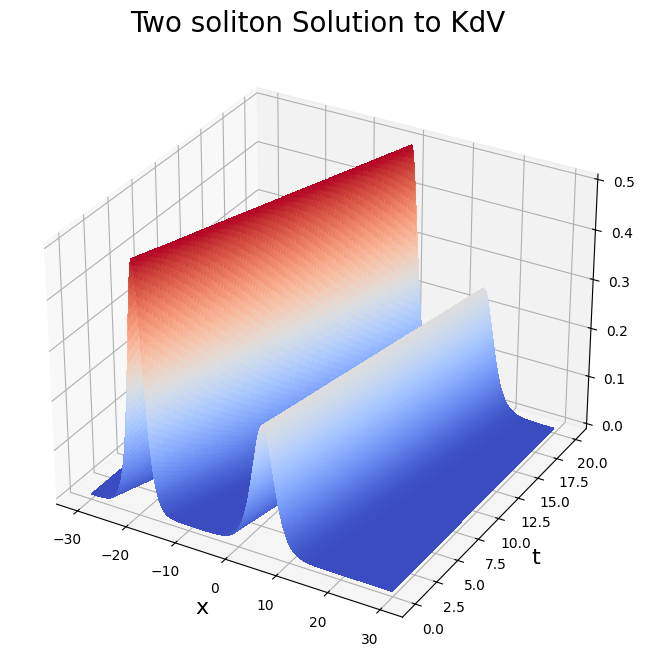

In [4]:
X, T = np.meshgrid(x, t)
fig = figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T, U.T, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)
title('Two soliton Solution to KdV', fontsize = 20)
xlabel('x', fontsize = 16)
ylabel('t', fontsize = 16)

In [5]:
Ut, R, rhs_des = build_linear_system(U, dt, dx, D=3, P=2, time_diff = 'FD', space_diff = 'FD')
['1']+rhs_des[1:]

['1',
 'u',
 'u^2',
 'u_{x}',
 'uu_{x}',
 'u^2u_{x}',
 'u_{xx}',
 'uu_{xx}',
 'u^2u_{xx}',
 'u_{xxx}',
 'uu_{xxx}',
 'u^2u_{xxx}']

In [7]:
# Solve with STRidge using 2-norm normalization
w = TrainSTRidge(R,Ut,10**-5,5)
# w = TrainSTRidge(R, Ut, lam=1e-5, d_tol=1e-6, normalize=False)

print("PDE derived using STRidge")
print_pde(w, rhs_des)

PDE derived using STRidge
u_t = (-5.955399 +0.000000i)uu_{x}
    + (-0.987754 +0.000000i)u_{xxx}
   


In [8]:
err = abs(np.array([(6 - 5.956504)*100/6, (1 - 0.988106)*100]))
print(mean(err))        
print(std(err))

0.9571666666666663
0.23223333333332968


In [9]:
numpy.random.seed(0)
Un = U + 0.01*std(U)*np.random.randn(n,m)

In [10]:
Utn, Rn, rhs_des = build_linear_system(Un, dt, dx, D=3, P=2, 
                                 time_diff = 'poly', space_diff = 'poly', 
                                 width_x = 20, width_t = 10, deg_x = 5)

In [11]:
# Solve with STRidge using 2-norm normalization
wn = TrainSTRidge(Rn,Utn,10**-5,1)
print("PDE derived using STRidge")
print_pde(wn, rhs_des)

PDE derived using STRidge
u_t = (-6.173902 +0.000000i)uu_{x}
    + (-1.137839 +0.000000i)u_{xxx}
   


In [12]:
err = abs(np.array([(6 - 6.152522)*100/6, (1 - 1.124033)*100]))
print(mean(err))
print(std(err))

7.4726666666666715
4.930633333333334
